In [637]:
from numpy.random import uniform, pareto
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.stats import gamma, expon, dirichlet, beta
from scipy import special
import pandas as pd


In [35]:
seq = uniform(0, 1, 10000)

realseq = np.linspace(-10,10, 10000)

def transform(x):
    return np.log(x/(1 - x))

def transformTrue(x):
    return np.exp(-x) / (1+ np.exp(-x))**2

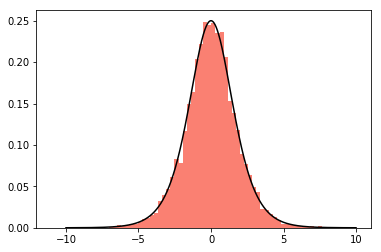

In [49]:
trans = transform(seq)
plt.hist(trans, bins=70, density=True, color='salmon')
plt.plot(realseq, transformTrue(realseq), color='black')
plt.show()

                  0
count  10000.000000
mean       9.389932
std       92.680294
min        1.000026
25%        1.336505
50%        1.993963
75%        4.031341
max     5261.687487
Median  1.993962569368576  Mode  1.0000260327422155


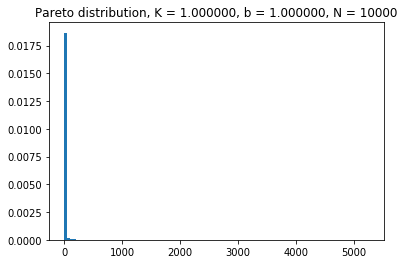

In [660]:
K = 1
b = 1

def plotPareto(K, b, N = 10000):
    seq = (pareto(K, N) + 1) * b
    print(pd.DataFrame(seq).describe())
    print('Median ', np.median(seq), ' Mode ', sp.stats.mode(seq)[0][0])
    plt.hist(seq, bins=100, density=True)
    plt.title('Pareto distribution, K = %f, b = %f, N = %i' % (K, b, N))
    plt.show()
    
plotPareto(1, 1, 10000)

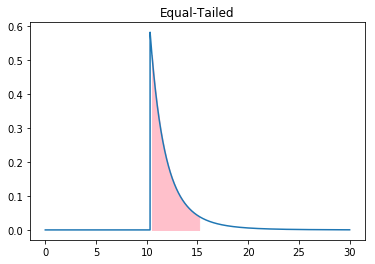

In [661]:
y = [1.36, 7.47, 7.31, 7.48, 10.33]

x = np.linspace(0, 30, 10000)

out = sp.stats.pareto.pdf(x, b=K + len(y), scale=max(y + [b])) 

ppf = sp.stats.pareto.ppf([0.1, 0.9], b=K + len(y), scale=max(y + [b]))

plt.plot(x, out)
section = np.arange(ppf[0], ppf[1], step=0.001)
plt.fill_between(section, sp.stats.pareto.pdf(section, b=K + len(y), scale=max(y + [b])), color='pink')
plt.title('Equal-Tailed')
plt.show()

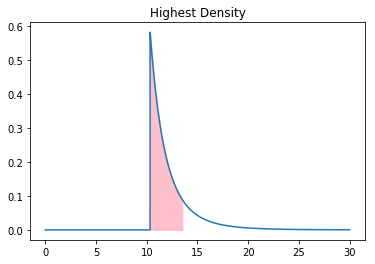

In [662]:
out = sp.stats.pareto.pdf(x, b=K + len(y), scale=max(y + [b])) 

ppf = sp.stats.pareto.ppf([0, 0.8], b=K + len(y), scale=max(y + [b]))

plt.plot(x, out)
section = np.arange(ppf[0], ppf[1], step=0.001)
plt.fill_between(section, sp.stats.pareto.pdf(section, b=K + len(y), scale=max(y + [b])), color='pink')
plt.title('Highest Density')
plt.show()

                  0
count  10000.000000
mean      12.423171
std        2.620426
min       10.330015
25%       10.834340
50%       11.602578
75%       13.035713
max       65.471484
Median  11.602577509586489  Mode  10.330015150454926


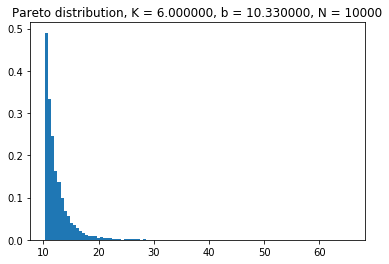

In [663]:
plotPareto(K + len(y), max(y + [b]))

In [207]:
p11 = np.sum(out[x > 11]) / np.sum(out)
p1113 = np.sum(out[(x > 11) & (x < 13)]) / np.sum(out)

print('Probability Theta > 11 is %.3f\nProbability 11 < Theta < 13 is %.3f' % (p11, p1113))

Probability Theta > 11 is 0.685
Probability 11 < Theta < 13 is 0.434


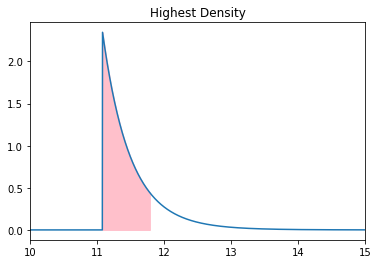

In [210]:
y_new = [1.36, 7.47, 7.31, 7.48, 10.33, 7.68, 0.11, 2.79, 7.99, 6.17, 8.32,6.54, 3.39, 11.08, 3.51, 10.05, 3.43, 3.20, 2.24, 2.79, 3.80, 3.63,1.91, 0.48, 2.63]

out = sp.stats.pareto.pdf(x, b=K + len(y_new), scale=max(y_new + [b])) 

ppf = sp.stats.pareto.ppf([0, 0.8], b=K + len(y_new), scale=max(y_new + [b]))

plt.plot(x, out)
section = np.arange(ppf[0], ppf[1], step=0.001)
plt.fill_between(section, sp.stats.pareto.pdf(section, b=K + len(y_new), scale=max(y_new + [b])), color='pink')
plt.title('Highest Density')
plt.xlim(10, 15)
plt.show()

Probability Theta > 11 is 1.000
Probability 11 < Theta < 13 is 0.984
                  0
count  10000.000000
mean      11.519898
std        0.463426
min       11.080001
25%       11.202086
50%       11.375806
75%       11.677863
max       16.847582
Median  11.375805819357993  Mode  11.080000614319436


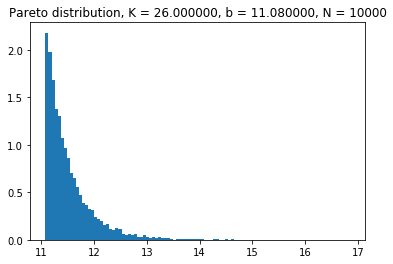

In [215]:
p11 = np.sum(out[x > 11]) / np.sum(out)
p1113 = np.sum(out[(x > 11) & (x < 13)]) / np.sum(out)

print('Probability Theta > 11 is %.3f\nProbability 11 < Theta < 13 is %.3f' % (p11, p1113))

plotPareto(K + len(y_new), max(y_new + [b]))

In [371]:

states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

states = {
    v.lower(): k for k, v in states.items()
}

df = pd.read_stata('pew_research_center_june_elect_wknd_data.dta')
df['state'] = df['state'].replace(to_replace={'washington dc': 'district of columbia'})
df.head()

,survey,rid,date,sample,phoneuse,zipcode,msa,usr,form,thoughtpres,...,state,cregion,partysum,relign,heat2,cheat,age2,educ2,income2,party4
0,june08voter,1720,62708,landline,dual-all or almost all calls on home phone,01007,44140,S,form 2,NaN,...,massachusetts,east,democrat/lean democrat,white non-hispanic catholic,dem/lean dem,dem/lean dem,50-64,college graduate,"$50,000 to $74,999",democrat
1,aug08relig,668,80208,landline,dual-all or almost all calls on home phone,01010,44140,2,form 1,NaN,...,massachusetts,east,republican/lean republican,secular,other-dk,NaN,30-49,college graduate,"$75,000+",republican
2,aug08relig,50,73108,landline,"dual-some calls on cell phone, some on home phone",01013,44140,2,form 1,NaN,...,massachusetts,east,democrat/lean democrat,white non-hispanic catholic,dem/lean dem,NaN,50-64,some college,NaN,independent
3,aug08relig,50533,80208,cell,"dual-some calls on cell phone, some on home phone",01013,44140,,form 2,NaN,...,massachusetts,east,refused to lean,other protestant,dem/lean dem,NaN,30-49,some college,"$30,000 to $49,999",independent
4,june08voter,30091,62108,18-29 oversample (landline),dual-all or almost all calls on cell phone,01020,44140,S,form 1,NaN,...,massachusetts,east,democrat/lean democrat,other religion,dem/lean dem,dem/lean dem,18-29,college graduate,"$75,000+",democrat


In [265]:
dfres = pd.read_csv('2008ElectionResult.csv')
dfres['state'] = dfres['state'].str.lower()
dfres.head()


,state,vote_Obama,vote_Obama_pct,vote_McCain,vote_McCain_pct,electoral_vote_dem,electoral_vote_rep
0,alabama,811764,38.8,1264879,60.4,NaN,9.0
1,alaska,105650,37.7,168844,60.2,NaN,3.0
2,arizona,948648,45.0,1132560,53.8,NaN,10.0
3,arkansas,418049,38.8,632672,58.8,NaN,6.0
4,california,7245731,60.9,4434146,37.3,55.0,NaN


In [631]:
very_lib = df[df['ideo'] == 'very liberal']

proportions = {
                s: [ 
                   len(very_lib[very_lib['state'] == s]) / len(df[df['state'] == s]),
                   dfres[dfres['state'] == s]['vote_Obama_pct'].values[0] / 100
                ] 
               for s in df['state'].unique()
              }


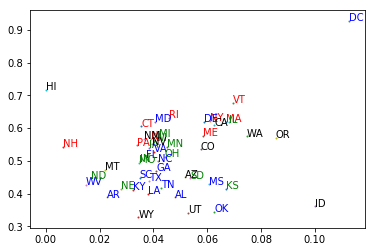

In [649]:
regions = {s: df[df['state'] == s].head(1)['cregion'].values[0] for s in df['state'].unique()}
cols = {
    'east': 'red',
    'midwest': 'green',
    'south': 'blue',
    'west': 'black'
}

for k, v in proportions.items():
    plt.scatter(v[0], v[1], s=1)
    plt.annotate(states[k], (v[0], v[1]), color=cols[regions[k]], size=10)
    
# plt.xlim(0, 0.1)
# plt.ylim(0.3, 0.75)
plt.show()

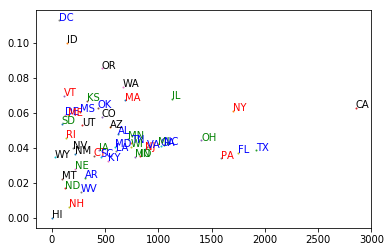

In [598]:

n = (df['state'].sort_index().value_counts()).sort_index()
y = (df[df['ideo'] == 'very liberal']['state'].sort_index().value_counts().append(pd.Series({'hawaii': 0}))).sort_index()


for i, vals in enumerate(zip(y / n, n)):
    yval, nval = vals
    plt.scatter(nval, yval, s =1)
    plt.annotate(states[n.index[i]], (nval, yval), color=cols[regions[n.index[i]]], size=10)

def beta_binomial(n, k, b, a):
    return special.comb(n, k) * (special.beta(k + a, n - k + b) / special.beta(a, b))

def ll(a):
    return -np.sum(beta_binomial(n, y, a[0], a[1]))

In [636]:
v, som, other = sp.optimize.fmin_l_bfgs_b(ll, x0=[10, 1], args=(), approx_grad=True)
a = v[1]
b = v[0]
print(v)

[326.63175409  15.20735388]


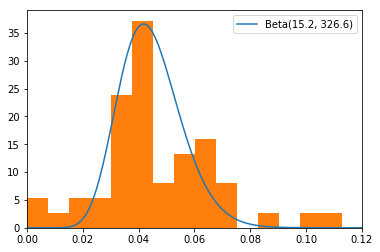

In [639]:
seq = np.arange(0, 1, 0.001)

plt.plot(seq, beta.pdf(seq, a, b), label=('Beta(%.1f, %.1f)' % (a, b)))
plt.hist(y / n, bins=15, density=True)
plt.legend()

plt.xlim(0.0, 0.12)

plt.show()


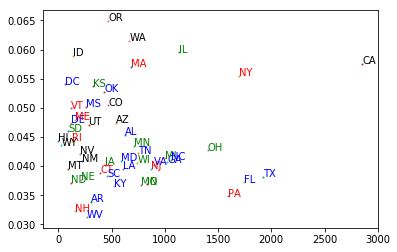

In [654]:
def beta_mean(a, b):
    return a / (a + b)

means = beta_mean(y + a, n + b)

for i, vals in enumerate(zip(means, n)):
    yval, nval = vals
    plt.scatter(nval, yval, s =1)
    plt.annotate(states[n.index[i]], (nval, yval), color=cols[regions[n.index[i]]], size=10)
    
plt.show()